<a href="https://colab.research.google.com/github/vitorbeltrao/VB_data_science/blob/main/Machine_Learning_Previs%C3%A3o_pre%C3%A7os_do_bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*by [Vitor Beltrão](https://www.linkedin.com/in/v%C3%ADtor-beltr%C3%A3o-56a912178/)*

---

# Projeto de Machine Learning - Previsão do Preço do Bitcoin

A bolsa de valores é um ambiente de negociação, ou um mercado no qual empresas de capital aberto listam seus ativos e investidores podem comprar ou vender tais ativos entre eles. Além de ter a função de oferecer um ambiente único e seguro que garanta a liquidação das negociações, é responsável também pela guarda dos ativos.

O mercado de ações é um ambiente onde são negociados ativos financeiros, tais como ações, opções de ações, contratos futuros e Fundos de Investimento Imobiliário. 

Mais recentemente nesse mercado, surgiram as criptomoedas. Mais especificamente o Bitcoin surgiu em 2008 como uma resposta à crise financeira, com a ideia de substituir o dinheiro físico que usamos e, principalmente, tirar a necessidade de intermediação dos bancos nas operações financeiras.

Genericamente, uma criptomoeda é um tipo de dinheiro – como outras moedas com as quais convivemos cotidianamente – com a diferença de ser totalmente digital. Além disso, ela não emitida por nenhum governo (como é o caso do real ou do dólar, por exemplo).

<p align=center>
<img src="https://images.unsplash.com/photo-1543699539-33a389c5dcfe?ixid=MnwxMjA3fDB8MHxzZWFyY2h8NHx8Yml0Y29pbnxlbnwwfHwwfHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60" width="40%"></p>

**Neste trabalho, vamos utilizar um modelo de Machine Learning (regressão linear), para prever os preços do bitcoin e assim conseguir auxiliar os profissionais dessa área. Lembrando que, este modelo de trabalho, pode se expandir para previsão de qualquer ação da bolsa de valores que contenha dados históricos que possa alimentar o modelo.**

## Aquisição dos Dados

Os dados deste trabalho, foram adquiridos pelo [Yahoo Finance](https://https://finance.yahoo.com/). Lá é possível extrair todo o conjunto de dados históricos de uma determinada ação.

Visto tudo isso, o objetivo principal do trabalho é: **Previsão dos preços do bitcoin fazendo uma explanação geral da teoria por trás da regressão linear**.

In [51]:
# Importar os pacotes necessários
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/vitorbeltrao/Datasets/main/BTC-USD.csv")

## Análise Exploratória dos Dados

Nesta etapa do trabalho, o objetivo principal é fazer uma análise completa de toda a informação que conseguirmos extrair do conjunto de dados em questão. 

Após ter as informações que precisamos, vamos partir para uma outra etapa que é a de limpeza e tratamento dos dados.

Nesta primeira análise vamos executar as seguintes tarefas:
* Verificar as primeiras entradas para termos uma visão geral do dataframe;
* Verificar o tipo das variáveis e os valores ausentes;
* Ver a porcentagem de valores ausentes;
* Verificar o resumo estatístico do dataframe;
* Plotar um gráfico de linhas para verificar a tendência dos valores do bitcoin;
* Plotar um gráfico candlestick;
* Analisar a correlação entre as variáveis.



In [52]:
# Verificar as 05 primeiras entradas do dataset.
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


Nessa primeira análise das entradas do dataset, podemos já entender com quais variáveis vamos trabalhar que são: Data, Open, High, Low, Close, Adjclose e volume. Podemos ver também como as entradas foram alimentadas (se são strings ou numéricas, por exemplo).

**Entendendo o que cada variável representa:**
* Data: dia, mês e ano que ocorreram as respectivas cotações;
* Open: Valor de abertura do bitcoin naquela data;
* High: Valor mais alto que o bitcoin atingiu naquela data;
* Low: Menor valor que o bitcoin atingiu naquela data;
* Close: Valor em que o bitcoin fechou naquela data;
* Adj Close: Valor de fechamento na data, após ser contabilizado as ações corporativas;
* Volume: Quantidade de bitcoins negociados na data.

In [53]:
# Verificar o tipo das variáveis e os valores ausentes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2411 entries, 0 to 2410
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2411 non-null   object 
 1   Open       2407 non-null   float64
 2   High       2407 non-null   float64
 3   Low        2407 non-null   float64
 4   Close      2407 non-null   float64
 5   Adj Close  2407 non-null   float64
 6   Volume     2407 non-null   float64
dtypes: float64(6), object(1)
memory usage: 132.0+ KB


Nessa segunda análise, conseguimos perceber que todas as variáveis estão como float (o que era esperado, visto que todas as entradas que vimos acima são valores numéricos), exceto a variável "Date", que está como object, na etapa de limpeza vamos alterar essa variável.

Esse dataset tem um total de 2411 entradas.

In [54]:
# Verificar a porcentagem de valores ausentes.
df.isnull().sum() / df.shape[0]

Date         0.000000
Open         0.001659
High         0.001659
Low          0.001659
Close        0.001659
Adj Close    0.001659
Volume       0.001659
dtype: float64

Conseguimos perceber acima que esse dataset apresenta uma pequena porcentagem de valores ausentes nas variáveis numéricas. Corrigiremos isso na etapa de preparação dos dados.

In [55]:
# Verificar o resumo estatístico.
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2.407000e+03
mean,6925.349162,7118.669350,6723.558865,6945.101357,6945.101357,1.180390e+10
std,10448.080418,10772.470186,10093.878167,10483.009687,10483.009687,1.877718e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,455.757507,460.410492,450.057007,455.661514,455.661514,6.775725e+07
50%,4131.979980,4245.439941,4020.894043,4134.441406,4134.441406,3.789400e+09
75%,8940.442871,9202.832520,8790.986328,8987.823243,8987.823243,1.770224e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


Nessa análise estatística acima, podemos perceber que os valores do bitcoin subiram muito rapidamente, pois, até o 2° quartil, o valor era de aproximadamente US 4000,00 e no 3° quartil ele já alcança o valor de aproximadamente US 9000,00 sendo que o valor máximo está em aproximadamente US 63000,00.

A média dos valores é também superior a todos os valores até o 2° quartil. Vamos plotar um gráfico para visualizar melhor essas informações.

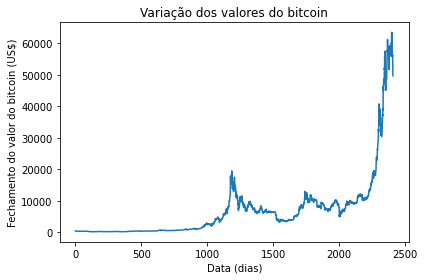

In [56]:
# Gráfico de linhas
fig, ax = plt.subplots()
df["Close"].plot(kind="line" , ax=ax)

ax.set_title("Variação dos valores do bitcoin")
ax.set_ylabel("Fechamento do valor do bitcoin (US$)")
ax.set_xlabel("Data (dias)")

plt.tight_layout()

Conforme discutimos acima, o bitcoin realmente sofreu um crescimento exponencial aproximadamente a partir do dia 2000.

In [57]:
# Plotar um gráfico candlestick
!pip install plotly
import plotly.graph_objects as go

# criar um gráfico interativo com o Plotly
# gráfico BTC-USD (candlestick)
trace1 = {
    'x': df.Date,
    'open': df.Open,
    'close': df.Close,
    'high': df.High,
    'low': df.Low,
    'type': 'candlestick',
    'name': 'BTC-USD',
    'showlegend': False
}
 
# informar todos os dados e gráficos em uma lista
data = [trace1]
 
# configurar o layout do gráfico
layout = go.Layout({
    'title': {
        'text': 'Gráfico de Candlestick - BTC-USD',
        'font': {
            'size': 20
        }
    }
})
 
# instanciar objeto Figure e plotar o gráfico
fig = go.Figure(data=data, layout=layout)
fig.show()


Acima fizemos um gráfico do tipo 'candlestick', muito comum nessa área de mercado financeiro, que interativamente mostra os valores do bitcoin em determinada data, apenas colocando o cursor do mouse onde você quer analisar.

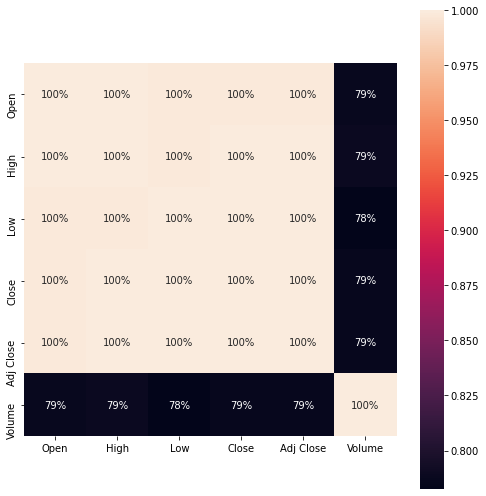

In [58]:
# Análise da correlação entre as variáveis
corr = df.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, fmt='.0%', annot=True, square=True)
plt.tight_layout()

Podemos ver pelo gráfico de correlação acima, que as variáveis tem muita relação entre si, o que será bastante útil para alimentar o nosso modelo de machine learning.

## Preparação dos Dados

Nesta etapa, costumamos realizar diversas tarefas para adequar o dataset que geralmente vem bastante desordenado. No caso desse dataset especificamente, vamos precisar tratar a variável "Data" informando como queremos que ela fique e também excluir alguns valores ausentes nas nossas variáveis conforme vimos na análise exploratória.

In [59]:
# Transformar a variável "Date"
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2411 entries, 0 to 2410
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2411 non-null   datetime64[ns]
 1   Open       2407 non-null   float64       
 2   High       2407 non-null   float64       
 3   Low        2407 non-null   float64       
 4   Close      2407 non-null   float64       
 5   Adj Close  2407 non-null   float64       
 6   Volume     2407 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 132.0 KB


Como podemos ver, trocamos a variável "Date" de "object" para "datetime", assim o pandas consegue reconhecê-la.

In [60]:
# Excluindo valores ausentes
from sklearn.impute import SimpleImputer
num_df = df.select_dtypes(exclude='datetime64[ns]').columns

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df.loc[:,num_df])
df.loc[:,num_df] = imputer.transform(df.loc[:,num_df])

df.isnull().sum() / df.shape[0]

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

Como podemos ver, agora nosso dataset não possui nenhum valor ausente em suas colunas. Fizemos uma substituição dos valores ausentes pela mediana dos valores do dataset, o que não deve alterar em nada nosso resultado final.

## Modelo de Machine Learning

Nesta etapa, vamos criar o nosso modelo para fazer previsões. Neste caso será utilizado o modelo de **regressão linear múltipla**.

Iremos utilizar a regressão linear para esse problema, pois, em primeiro lugar, se trata de um problema de aprendizagem supervisionada, já que, recebemos um conjunto de dados e sabemos como deve ser o output correto, tendo a ideia de que existe uma relação entre o input e o output. Em segundo lugar, vamos tentar prever os resultados em uma saída contínua, o que significa que estamos tentando mapear as variáveis de entrada para alguma função contínua.

### Representação do modelo

* X: Variáveis de entrada / Recursos de entrada;
* y: "produto" / variável de destino que estamos tentando prever;
* (X, y): Par de exemplos de treinamento;
* m: Tamanho do conjunto de treinamento;
* h: Função de hipótese que estamos tentando aprender, de forma que 'h' seja um bom preditor para o valor correspondente de 'y';
* **Usaremos 'X' para denotar o espaço dos valores de entrada e 'y' os de saída.**
<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/Slide1.PNG?raw=true" width="50%"></p>

A forma multivariável da função de hipótese acomodando vários recursos é: <img src="https://github.com/vitorbeltrao/Pictures/blob/main/equa%C3%A7ao%20da%20reta%20linear%20multivariavel.png?raw=true" width="50%"></p>

Vamos agora entender como essa equação se posiciona em um plano (X, y).

<img src="https://github.com/vitorbeltrao/Pictures/blob/main/dados%20plotados.png?raw=true" width="50%"></p>

Nesse primeiro plano, estamos apenas plotando nossos pontos que representam os dados do nosso dataset. Em termos visuais, nosso conjunto de dados de treinamento está espalhando no plano XY.

<img src="https://github.com/vitorbeltrao/Pictures/blob/main/dados%20com%20reta%20plotados.png?raw=true" width="50%"></p>

Nesse segundo plano, plotamos também a nossa reta (h). Estamos tentando fazer uma reta (definida por h(x)) que passa por estes pontos de dispersão. **Nosso objetivo é obter a reta que melhor representa o conjunto de dados.**

**A melhor reta possível, será tal que as distâncias verticais quadradas médias dos pontos espalhados da reta serão as menores. Segue imagem abaixo mostrando como isso funciona no plano. Os pontos dos dados plotados do gráfico a direita, tem distâncias verticais com relação a reta (h) menores do que os pontos dos dados do gráfico plotados a esquerda, ou seja, a reta do gráfico à direita representa melhor os dados que a reta do gráfico à esquerda.**

<img src="https://github.com/vitorbeltrao/Pictures/blob/main/distancias%20verticais.png?raw=true" width="60%"></p>

Conforme sabemos, queremos descobrir a melhor equação da reta possível. Nessa equação da reta, temos os valores de 'X' conhecidos, pois, eles são as features (colunas) do dataset em estudo. O desafio será encontrar os valores dos coeficientes 'theta', que seriam a inclinação da nossa reta, para que a mesma chegue na melhor inclinação possível que se adeque aos dados. Vamos nos tópicos abaixo aprender como chegar nos melhores valores de 'theta' possíveis.

### Função de custo

Podemos medir a precisão da nossa função de hipótese usando uma função de custo. Isso leva a uma diferença média de todos os resultados da hipótese com entradas de 'X' e a saída real de 'y'. Segue a função de custo: 

<img src="https://github.com/vitorbeltrao/Pictures/blob/main/fun%C3%A7ao%20custo.png?raw=true" width="30%"></p>

Essa função é também chamada de "função do erro quadrático médio" (MSE).

A média é dividida pela metade como uma conveniência para o cálculo da descida do gradient descent (falaremos sobre isso no próximo tópico), já que o termo derivado da função quadrada cancelará o 1/2.

**Vamos definir nossa ideia geral: Escolher os valores de 'theta' para ter um h(x) o mais próximo possível de 'y', para nossos exemplos de treino (X, y) e assim minimizar a função J(theta).**

### Gradient Descent

Temos, então, nossa função de hipótese - h(x) e temos uma maneira de medir o quão bem ela se encaixa nos dados pela função de custo - J(theta).

Agora precisamos estimar os parâmetros na função de hipótese, e, é ai que entra o gradient descent.

Saberemos que tivemos sucesso quando nossa função de custo obter seu valor mínimo. A maneira como fazemos isso é tomando a derivada da nossa função de custo. 

O algoritmo do gradient descent é:

<img src="https://github.com/vitorbeltrao/Pictures/blob/main/gradient%20descent.png?raw=true" width="30%"></p>

Esse algoritmo já está com a derivada da função de custo deduzida, portanto, basta utilizá-lo para repetir até a convergência (onde a nossa função de custo é mínima). **No gráfico representado abaixo, o ponto azul é o custo mínimo que queremos chegar e os pontos em vermelho são o algoritmo do gradient descent trabalhando (repetindo) até chegar a convergência. O tamanho do "passo" desses pontos vermelhos é determinado pelo learning rate (alfa).**

<img src="https://github.com/vitorbeltrao/Pictures/blob/main/gradient%20descent%20grafico.png?raw=true" width="50%"></p>

Devemos ajustar nosso parâmetro 'alfa' para garantir que o algoritmo do gradient descent converge para o mínimo em um tempo razoável. A falta de convergência ou muito tempo para obter o valor mínimo implica que o tamanho do nosso passo (learning rate - alfa) está errado.

<img src="https://github.com/vitorbeltrao/Pictures/blob/main/learning%20rate%20pequeno.png?raw=true" width="50%"></p>

Lerning rate(alfa) muito pequeno - muito tempo para obter o valor mínimo.

<img src="https://github.com/vitorbeltrao/Pictures/blob/main/learning%20rate%20alto.png?raw=true" width="50%"></p>

Learning rate(alfa) muito grande - Não converge para o valor mínimo.

A intuição por trás da convergência é que a derivada aproxima-se de zero a medida que nos aproximamos da parte inferior da nossa função convexa. **No ponto mínimo, a derivada será sempre zero**.

**O ponto de tudo isso é que se começarmos com um palpite para nossa hipótese e, em seguida, aplicarmos repetidamente essas equações de gradient descent, nossa hipótese se tornará cada vez mais precisa.**

Vamos agora, montar o nosso modelo no python para vermos na prática toda essa teoria. Na prática com os avanços das linguagens computacionais, muitas vezes não conseguimos visualizar essa teoria funcionando, pois, as linguagens e as bibliotecas existentes conseguem já automatizar muita coisa, **mas eu ressalto que aprender essa parte teórica te dará muito mais destreza para resolver problemas com o machine learning.**
















Antes de começarmos a criar nosso modelo, vou excluir a variável 'Date', pois ela nada influencia no nossos dados, como vimos na matriz de correlação.


In [61]:
# Excluindo a variável 'Date'
df.drop('Date', axis=1, inplace=True)
df.head()
print("Tamanho de df: {}\n".format(df.shape))

Tamanho de df: (2411, 6)



In [62]:
#1. Importar o modelo
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

#2. Escolher os hyperparameters
model = LinearRegression()

#3. Separar os dados entre feature matrix e target vector 
X = df.drop('Close', axis=1)
y = df['Close']

#4. Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

#5. Treinar o modelo
model.fit(X_train, y_train)

# Imprimir os coeficientes 'theta'
print("Coeficientes:\t", model.coef_)
print("Intercepto:\t", model.intercept_)

Coeficientes:	 [-3.66952135e-15  1.46213525e-15  9.30206242e-16  1.00000000e+00
 -1.36160546e-19]
Intercepto:	 1.5952537069097161e-09


Observe que, ao treinarmos o modelo, conseguimos descobrir todos os melhores valores possíveis para theta0, theta1, theta2, theta3, theta4 e theta5, ou seja, **chegamos na equação da reta ideal para esse dataset**.

Com o modelo treinado, ele já está pronto para fazer previsões em cima de novos dados.

In [63]:
# 6. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)
print('Valores de fechamento do bitcoin previstos: US ', y_pred[:10])


Valores de fechamento do bitcoin previstos: US  [  402.152008    4029.326904   15802.900391   10774.426758
  9081.761719    9525.750977   51704.16015599   244.223999
  4073.26001     6281.200195  ]


In [67]:
# Comparar os valores previstos com os reais
print('Valores de fechamento do bitcoin reais: US ', y_test[:10])

Valores de fechamento do bitcoin reais: US  5         402.152008
1646     4029.326904
1191    15802.900391
2202    10774.426758
2073     9081.761719
2080     9525.750977
2381    51704.160156
195       244.223999
1061     4073.260010
1461     6281.200195
Name: Close, dtype: float64


Observe que nosso modelo previu exatamente igual aos valores reais, ou seja, atingiu uma acurácia de 100%. Em seguida, faremos a avaliação desse resultado.

### Avaliando o modelo

Um modelo de machine learning, deve ser quantificável, seja em termos de desempenho ou precisão.

No caso de modelos de regressão, vamos testar o desempenho do modelo em cima do nosso conjunto de testes usando as métricas abaixo:
* R-squared: calcula a acurácia do modelo, quantificando a qualidade entre 0 e 1 (0 pior desempenho; 1 melhor desempenho).
* Mean Absolut Error (MAE): É a média absoluta do erro, representada pela média das somas dos erros individuais (distâncias entre os pontos dos dados reais e a nossa reta (h) de previsão).
* Mean Squared Error (MSE): É a média dos quadrados dos erros, tende a penalizar exponencialmente os erros, tratando de forma diferente os erros grandes dos erros pequenos.

In [68]:
# Avaliar o desempenho do modelo
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("R2 score:\t", r2_score(y_test, y_pred))
print("MAE: \t", mean_absolute_error(y_test, y_pred))
print("MSE:\t", mean_squared_error(y_test, y_pred))

R2 score:	 1.0
MAE: 	 1.8268079188669279e-09
MSE:	 6.189571277134161e-18


Conforme vimos acima, quando nosso modelo previu exatamente os mesmos valores em comparação com os valores reais, ou seja uma acurácia de 100%. Provamos isso agora quando o R-squared deu o valor de 1,0 (valor máximo).

## Conclusão

Na prática, atingir uma acurácia de 100% nem sempre é uma coisa boa e realista. Pode ser que o nosso modelo esteja sofrendo um sobre ajuste, ou seja, ele não está generalizando. Isso significa que, quando o modelo for exposto a novos dados, ele não conseguirá atingir o mesmo desempenho de 100% que foi verificado nos tópicos anteriores deste trabalho, por exemplo. 

Conseguimos corrigir esse sobre ajuste utilizando técnicas como o cross-validation, porém isso será um assunto para um próximo trabalho, visto que, o objetivo desse é apenas mostrar todo o funcionamento do modelo de **regressão linear**, para que o leitor fique por dentro de toda a teoria que está por trás da programação e não fique apenas digitando linhas de código sem entender realmente a essência.

Espero ter conseguido ajudar a clarear o conhecimento por trás dos modelos de regressão. Em um próximo trabalho, vamos fazer uma explanação geral nos modelos de classificação. Vou deixar alguns links de trabalhos de classificação já feitos por mim anteriormente para quem estiver interessado em ir começando a entender ou aprofundar no assunto.

Fique a vontade para comentar, tirar alguma dúvida ou passar um feedback. Se você gostou nos siga aqui no blog que iremos continuar com essa série de trabalhos explicativos.

Obrigado!

**Trabalhos de classificação:**
* Projeto - Detecção de fraude em cartões de crédito: https://bit.ly/3ckwxw1
* Projeto - Churn Prediction para uma empresa de Telecomunicações: https://bit.ly/3c6fNJV
* Projeto - Análise de risco de crédito: https://bit.ly/3fzggXd




